<h3>Car Price Predictions</h3>
In this notebook, we will attempt to predict the price of a car based on several variables related to the car. <br>
A two part example of using Linear Regression to determine the impact of various features on car prices.<br>
The first part is an example of simple linear regression w one feature and the second part is with multiple features.<br> 
The code uses the scikit-learn library along with pandas, numpy and matplotlib.


In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [4]:
# Load csv data using pandas
car_df = pd.read_csv("CarPrice_Assignment.csv")

# examine first five rows of data
print(car_df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [5]:
# extract feature variables
X = car_df.drop("price", axis=1).values

# extract target variable
y = car_df["price"]

# print variable types
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


<h4>Simple Linear Regression</h4>
An analysis of how a single variable impacts car prices

In [6]:
# plot correlation between variables and feature and identify columns that are correlated
corr = car_df.corr(numeric_only=True) 
corr.style.background_gradient(cmap='coolwarm')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


Horsepower has a very strong correlation with price, so let's see how horsepower impacts the price of a car

In [7]:
# Prep horsepower data for model
X_horsepower = X[:, -4]
print(X_horsepower.shape, y.shape)

# pivot data
X_horsepower = X_horsepower.reshape(-1, 1)
print(X_horsepower.shape)

(205,) (205,)
(205, 1)


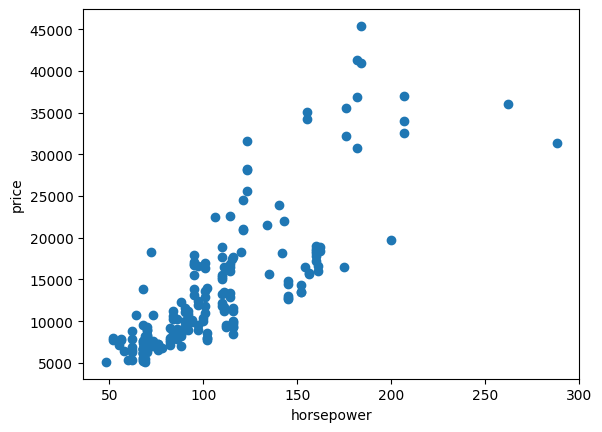

In [8]:
# plot data
plt.scatter(X_horsepower, y)
plt.xlabel("horsepower")
plt.ylabel("price")
plt.show()

From the scatterplot, we can see that as horsepower increases, so too does the price of the car.
In the next step, we will create predictions for car price based on horsepower and describe the relationship between the two.

Rsquared value is 0.653088356490231
There is a relatively strong relationship between horsepower and car price
The expected average price when horsepower is 0 is -3721.7614943227636
For every 1 unit increase in horsepower, the price is expected to go up by an average of $[163.26306097]


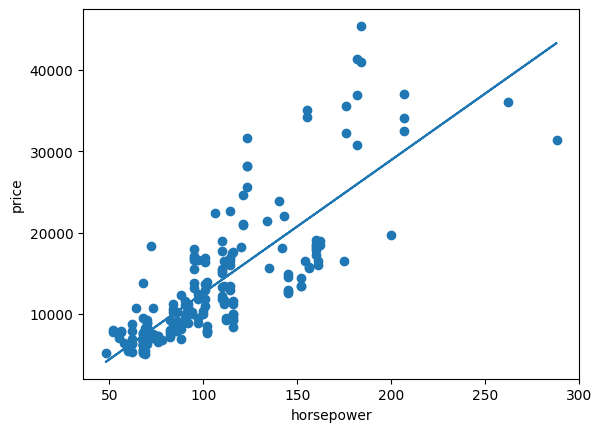

In [9]:
# single linear regression
reg = LinearRegression()
reg.fit(X_horsepower, y)
predictions = reg.predict(X_horsepower)
plt.scatter(X_horsepower, y)
plt.plot(X_horsepower, predictions)
plt.ylabel("price")
plt.xlabel("horsepower")

# model rsquared value
rsquared_singular = reg.score(X_horsepower, y)
print("Rsquared value is " + str(rsquared_singular))
print("There is a relatively strong relationship between horsepower and car price")

# model parameters
print("The expected average price when horsepower is 0 is " + str(reg.intercept_))
print("For every 1 unit increase in horsepower, the price is expected to go up by an average of $" + str(reg.coef_))

# show plot
plt.show()


<h4>Multiple Linear Regression</h4>
In this section, we will perform Linear Regression with multiple feature variables. <br>
Cross fold validation will also be performed, in order to train the model on multiple variations of the data set.

In [10]:
# multiple linear regression (manually selected 10 of 14 which did not seem to have strong correlation w each other)

# select variables
X_all = car_df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

# create linear regression instance
reg_all = LinearRegression()

# fit training data
reg_all.fit(X_train, y_train)

# create predictions on test set
y_pred = reg_all.predict(X_test)


In [11]:
# calculate r-squared value
rsquared = reg_all.score(X_test, y_test)
print("Rsqauared value is " + str(rsquared))

# calculate rmse
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error is " + str(rmse))

# model parameters
print("Intercept value is " + str(reg_all.intercept_))
print("Coefficient values are " + str(reg_all.coef_))


Rsqauared value is 0.7810191265233362
Root Mean Squared Error is 3895.119221100351
Intercept value is -67497.63367209696
Coefficient values are [-27.58977969 -41.60193734 833.7550844  163.29054204   2.40941815
  96.54775808  25.77971652   1.53841891 -38.33940037 -35.18045824]


The rsquared value shows a strong positive relationship between price and our features. <br>
The Root Mean Squared Error shows the difference between our predictions and the actual data. <br>
It provides an estimation of how well the model is able to predict the target value.<br>
In this case, our predictions were about $3,900 away from the actual price.<br> 
The coefficients show the price increase or decrease for every one unit gain in the coefficient variable.


<h4>Additional Exploration</h4>
Perform cross validation by training on data set multiple times, 

In [12]:
# k-fold cross-validation (diversify the r-squared value by sampling multiple times)

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg_cv = LinearRegression()
cv_results = cross_val_score(reg_cv, X_all, y, cv=kf)
print("rsquared values are " + str(cv_results))
print("average rsquared value is " + str(np.mean(cv_results)) + " and standard deviation is " + str(np.std(cv_results)))


rsquared values are [0.83023983 0.7210585  0.76641811 0.82262282 0.83092785 0.79768594]
average rsquared value is 0.7948255106836367 and standard deviation is 0.03997286321202107


The average rsquared value is higher than our original simple linear regression model and our prediction without cross fold validation.<br>
Our multiple linear regression model has provided a slightly better percentage of variance explained by our predictor variables.